In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [23]:
m = pd.read_csv('dataset/ceb-matrix.csv', index_col='filename').to_numpy()
pg_total = m[:, 0].sum()
optimal_total = np.min(m, axis=1).sum()
print('pg_total:', pg_total)
print('optimal_total:', optimal_total)

pg_p90 = np.percentile(m[:, 0], 90)
optimal_p90 = np.percentile(np.min(m, axis=1), 90)
print('pg_p90:', pg_p90)
print('optimal_p90:', optimal_p90)

pg_total: 10587.665450334549
optimal_total: 3688.4883341789246
pg_p90: 4.558033323287964
optimal_p90: 2.603392314910889


In [20]:
m = pd.read_csv('dataset/job-matrix.csv', index_col='filename').to_numpy()

In [6]:
linewidth=3
markersize=10
gridwidth=1.5
bwith=2
ticks_fontsize=16.5
label_fontsize=20
title_fontsize=25
fontweight='normal'
markeredgecolor = 'k'
color_scheme = [
    "#4995c6",  # 蓝色
    "#d47628",  # 黄色
    "#8fb943",  # 绿色
    "#d15c6b",  # 红色
    "#8481ba",  # 紫色
    "#413123",  # 棕色
    "#f7a128",  # 橙色,
    "#a5a5a5",  # 灰色,
    "#011F5B",  # 深蓝色
]

line_styles = ['-', '--', '-.', ':']

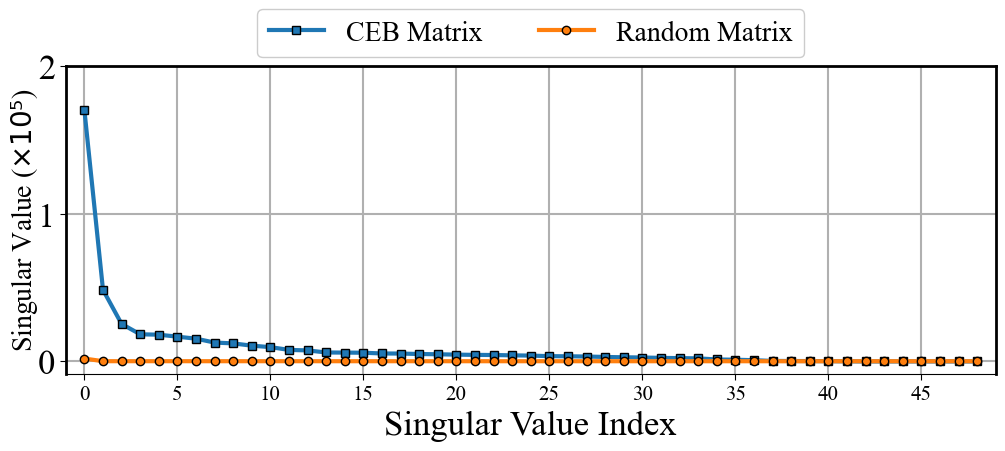

In [32]:
import numpy as np
from matplotlib.ticker import MaxNLocator

plt.rcParams["font.family"] = "Times New Roman"

U, S, Vh = np.linalg.svd(m, full_matrices=False)
random_m = np.random.rand(m.shape[0], m.shape[1])
random_U, random_S, random_Vh = np.linalg.svd(random_m, full_matrices=False)

# S_cdf = np.cumsum(S)
# random_S_cdf = np.cumsum(random_S)

S1 = list(S)
random_S1 = list(random_S)



fig, ax = plt.subplots(1,1,figsize=(12,4))
label_fontsize = 15

ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
ax.tick_params(axis='x', labelsize=15, length=4)
ax.tick_params(axis='y', labelsize=ticks_fontsize, length=4)
ax.grid(linewidth=gridwidth)

ax.plot(S, marker='s', label='CEB Matrix', linewidth=linewidth, markersize=6, markeredgecolor=markeredgecolor)
ax.plot(random_S, marker='o', label='Random Matrix',  linewidth=linewidth, markersize=6, markeredgecolor=markeredgecolor)

# plt.bar(x=cf,height=S1,  width =2 , color='#f94144', label="$th_1$",zorder = 100) #red
# plt.bar(x=cf + 2,  height=random_S1, width = 2, color='#ffc300', label="Random Matrix",zorder = 100) #yellow

# log y
#ax.set_yscale('log')
tick_ylabels = ["0", "1", "2"]
tick_xlabels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49"]
ax.set_xlim([-1, 49])
tick_positions = np.arange(0, 49, 5)
ax.set_xticks(tick_positions)
tick_xlabels = [str(i) for i in tick_positions]
ax.set_xticklabels(tick_xlabels)
#ax.set_xticklabels(tick_labels)
#ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_yticks([0, 10000, 20000])
ax.set_xticklabels(tick_xlabels)
ax.set_yticklabels(tick_ylabels)
plt.yticks(fontsize=25, fontweight=fontweight)
ax.set_xlabel('Singular Value Index', fontsize=25, fontweight=fontweight)
#ax.set_ylabel('Singular Value Magnitude ($\u00D710\u2075$)', fontsize=label_fontsize, fontweight=fontweight)
#ax.set_ylabel('')
ax.text(-0.06, 0.1,transform=ax.transAxes, s='Singular Value ($\u00D710\u2075$)',fontsize=20, fontweight=fontweight, rotation=90)
ax.legend(framealpha=1,fontsize=20, loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.23))
ax.grid('--')

plt.savefig('fig/svd.pdf', bbox_inches='tight', pad_inches=0.3, dpi=300)